In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
csv_path = r'/content/delhi_metro_updated (1).csv'
df = pd.read_csv(csv_path)
df.head()

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks
0,59771,2022-05-08,Inderlok,Kashmere Gate,12.94,77.99,18.27,13.0,Smart Card,maintenance
1,21363,2023-01-12,Model Town,Dilshad Garden,2.33,35.89,83.71,15.0,Tourist Card,maintenance
2,127325,2023-07-13,Kashmere Gate,Netaji Subhash Place,5.56,64.35,43.70,9.0,Single,off-peak
3,140510,2022-11-10,Chandni Chowk,Hauz Khas,4.02,144.13,14.98,27.0,NaN,maintenance
4,144298,2022-11-06,Rajiv Chowk,Kalkaji Mandir,9.66,104.96,83.84,23.0,Single,off-peak


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TripID              150000 non-null  int64  
 1   Date                150000 non-null  object 
 2   From_Station        150000 non-null  object 
 3   To_Station          150000 non-null  object 
 4   Distance_km         150000 non-null  float64
 5   Fare                150000 non-null  float64
 6   Cost_per_passenger  150000 non-null  float64
 7   Passengers          148500 non-null  float64
 8   Ticket_Type         148500 non-null  object 
 9   Remarks             123743 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 11.4+ MB


In [30]:
df["Ticket_Type"]

,Ticket_Type
0,Smart Card
1,Tourist Card
2,Single
3,NaN
4,Single
...,...
149995,Tourist Card
149996,Tourist Card
149997,Smart Card
149998,Single


In [31]:
print(df["Ticket_Type"].value_counts())

Ticket_Type
Tourist Card    59193
Single          37341
Smart Card      37244
Return          14722
Name: count, dtype: int64


In [32]:
mask = (df.index < 90000) & (df["Ticket_Type"].astype(str).str.strip().str.lower() == "return")
df.loc[mask, "Ticket_Type"] = "Tourist Card"

In [33]:
print(df["Ticket_Type"].value_counts())

Ticket_Type
Tourist Card    59193
Single          37341
Smart Card      37244
Return          14722
Name: count, dtype: int64


<Axes: xlabel='Ticket_Type', ylabel='count'>

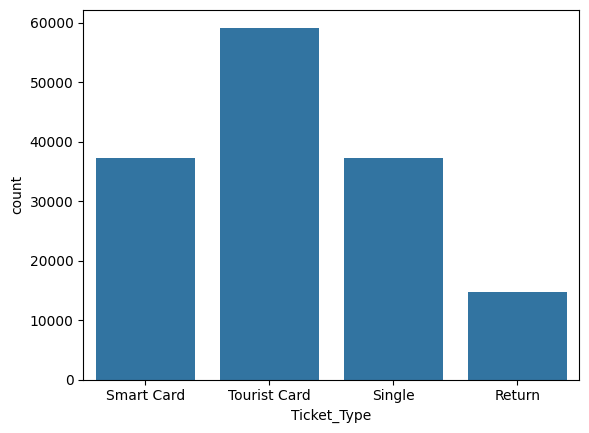

In [34]:
sns.countplot(x="Ticket_Type", data=df)

In [35]:
print('\nTicket_Type value counts (including NA):')
print(df['Ticket_Type'].value_counts(dropna=False).head())


Ticket_Type value counts (including NA):
Ticket_Type
Tourist Card    59193
Single          37341
Smart Card      37244
Return          14722
NaN              1500
Name: count, dtype: int64


In [36]:
print('\nRemarks blanks count: ', (df['Remarks']== '').sum())

print('\nPassengers null count: ', df['Passengers'].isna().sum())


Remarks blanks count:  0

Passengers null count:  1500


In [37]:
print('Before sample:')
print(df['From_Station'].sample(8))

Before sample:
77492          Hauz Khas  
90796          Mandi House
31160        Kashmere Gate
96301    Noida City Centre
41789    Noida City Centre
60084          Laxmi Nagar
5967           Hauz Khas  
10721            New Delhi
Name: From_Station, dtype: object


In [38]:
df['From_Station'] = df['From_Station'].astype(str).str.strip().str.title()

In [39]:
print('\nAfter sample:')
print(df['From_Station'].sample(8))


After sample:
138441    Netaji Subhash Place
24523             Jasola Vihar
70799        Noida City Centre
16690                Hauz Khas
68690           Kalkaji Mandir
31023                New Delhi
13669           Rajouri Garden
145392              Model Town
Name: From_Station, dtype: object


In [40]:
df['Ticket_Type'] = df['Ticket_Type'].replace('NA', np.nan)

print('Ticket_Type nulls:', df['Ticket_Type'].isna().sum())

Ticket_Type nulls: 1500


In [42]:
mode_ticket = df['Ticket_Type'].mode(dropna=True)[0]
print('Mode ticket type:', mode_ticket)

Mode ticket type: Tourist Card


In [43]:
df['Remarks'] = df['Remarks'].replace('', np.nan)
print('Remarks nulls after conversion:', df['Remarks'].isna().sum())

Remarks nulls after conversion: 26257


In [44]:
median_pass = int(df['Passengers'].median(skipna=True))
print('Median passengers:', median_pass)

Median passengers: 20


In [45]:
df['Passengers'] = df['Passengers'].fillna(median_pass)
print('Passengers nulls after replacing:', df['Passengers'].isna().sum())

Passengers nulls after replacing: 0


In [47]:
df['Profit_per_passenger'] = df['Fare'] - df['Cost_per_passenger']
df['Profit'] = df['Profit_per_passenger'] * df['Passengers']

In [48]:
print(df[['Fare','Cost_per_passenger','Passengers','Profit_per_passenger','Profit']].head())
print('\nTotal profit across dataset:', df['Profit'].sum())

     Fare  Cost_per_passenger  Passengers  Profit_per_passenger   Profit
0   77.99               18.27        13.0                 59.72   776.36
1   35.89               83.71        15.0                -47.82  -717.30
2   64.35               43.70         9.0                 20.65   185.85
3  144.13               14.98        27.0                129.15  3487.05
4  104.96               83.84        23.0                 21.12   485.76

Total profit across dataset: 127941908.47999999


In [49]:
cleaned_path = 'delhi_metro_cleaned_Dataset.csv'
df.to_csv(cleaned_path, index=False)
print('Saved cleaned CSV to', cleaned_path)

Saved cleaned CSV to delhi_metro_cleaned_Dataset.csv


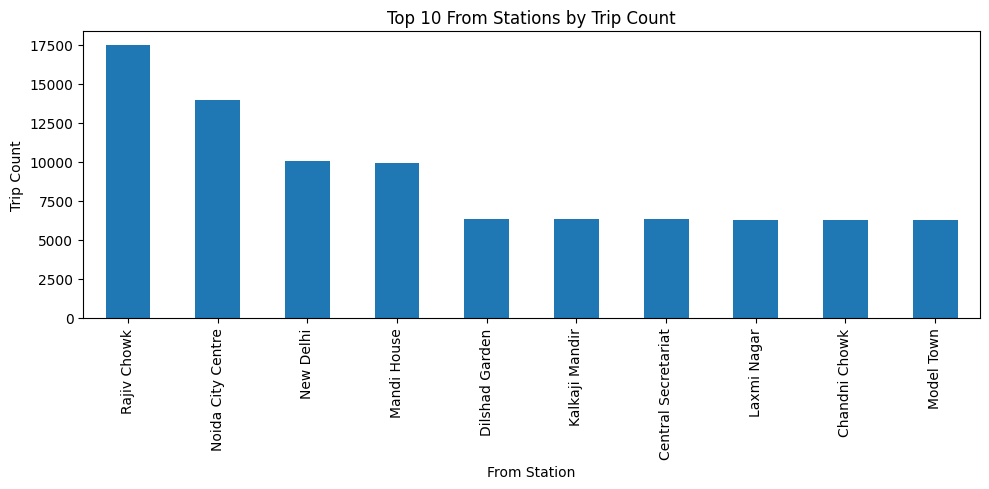

In [50]:
plt.figure(figsize=(10,5))
station_counts = df['From_Station'].value_counts().nlargest(10)
station_counts.plot(kind='bar')
plt.title('Top 10 From Stations by Trip Count')
plt.xlabel('From Station')
plt.ylabel('Trip Count')
plt.tight_layout()
plt.show()

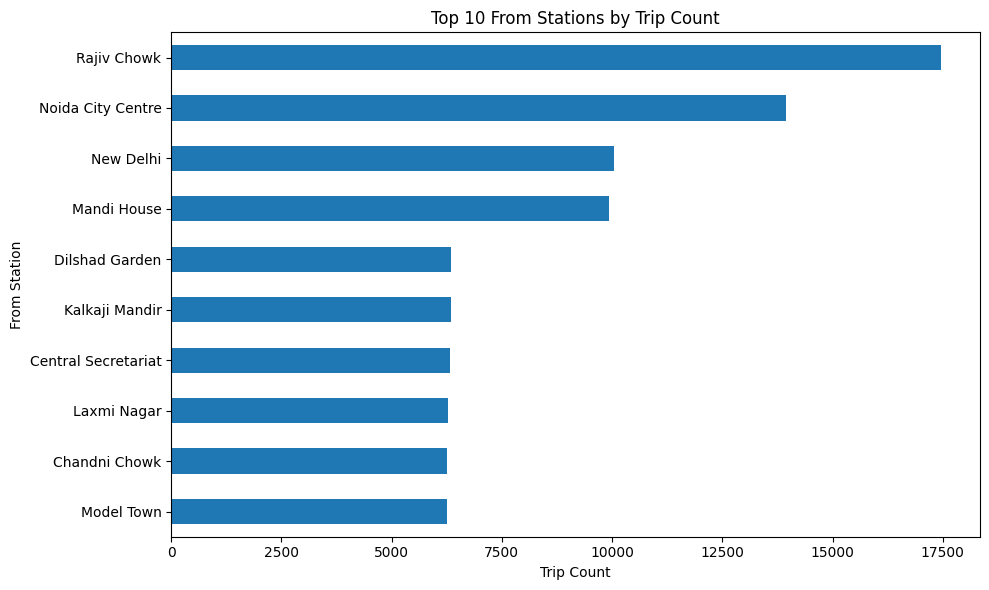

In [51]:
plt.figure(figsize=(10,6))
station_counts = df['From_Station'].value_counts().nlargest(10)

station_counts.plot(kind='barh')
plt.title('Top 10 From Stations by Trip Count')
plt.xlabel('Trip Count')
plt.ylabel('From Station')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [53]:
mask = (
    (df.index < 90000) &
    (
        df["From_Station"].astype(str).str.strip().str.lower().isin([
            "old delhi",
            "kirti nagar"
        ])
    )
)

df.loc[mask, "From_Station"] = "Noida City Centre"

In [54]:
print(df["From_Station"].value_counts().head(40))

From_Station
Rajiv Chowk             17470
Noida City Centre       13949
New Delhi               10037
Mandi House              9931
Dilshad Garden           6344
Kalkaji Mandir           6338
Central Secretariat      6328
Laxmi Nagar              6281
Chandni Chowk            6262
Model Town               6247
Inderlok                 6246
Rajouri Garden           6206
Janakpuri West           6205
Aiims                    6199
Kashmere Gate            6197
Hauz Khas                6183
Jasola Vihar             6099
Netaji Subhash Place     2539
Pragati Maidan           2535
Old Delhi                2515
Punjabi Bagh             2487
Kirti Nagar              2486
Shivaji Park             2473
Barakhamba Road          2443
Name: count, dtype: int64


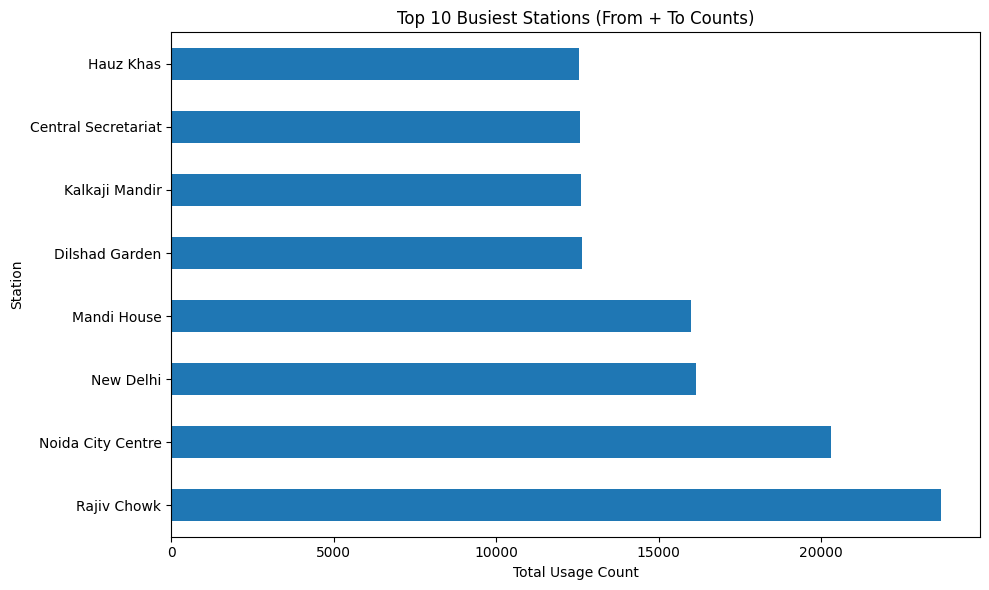

In [55]:
plt.figure(figsize=(10,6))
total_station_counts = (df['From_Station'].value_counts() + df['To_Station'].value_counts()).nlargest(8)

total_station_counts.plot(kind='barh')
plt.title('Top 10 Busiest Stations (From + To Counts)')
plt.xlabel('Total Usage Count')
plt.ylabel('Station')

plt.tight_layout()
plt.show()


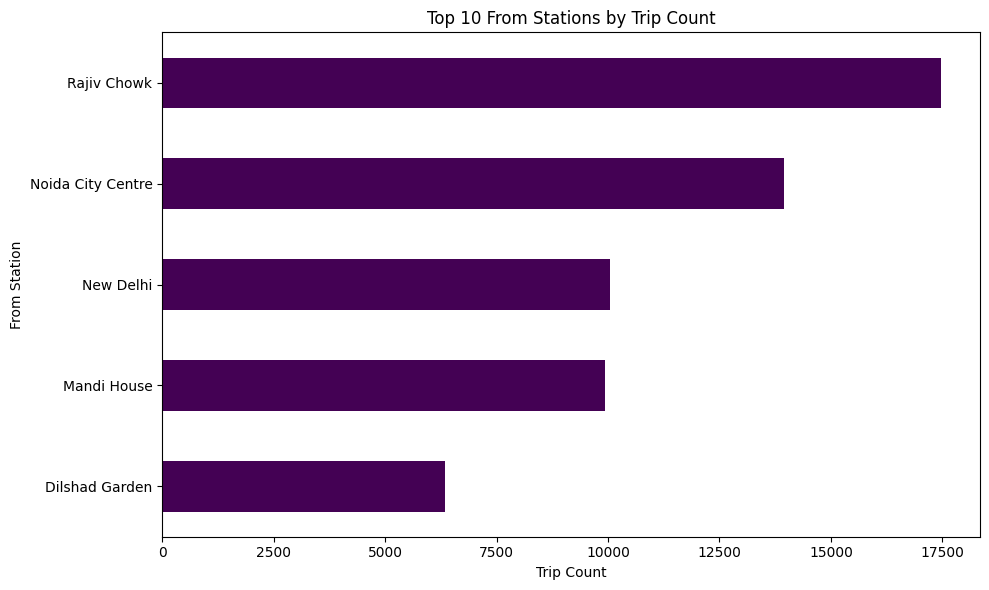

In [56]:
plt.figure(figsize=(10,6))
station_counts = df['From_Station'].value_counts().nlargest(5)

bars = station_counts.plot(kind='barh', cmap='viridis')
plt.title('Top 10 From Stations by Trip Count')
plt.xlabel('Trip Count')
plt.ylabel('From Station')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


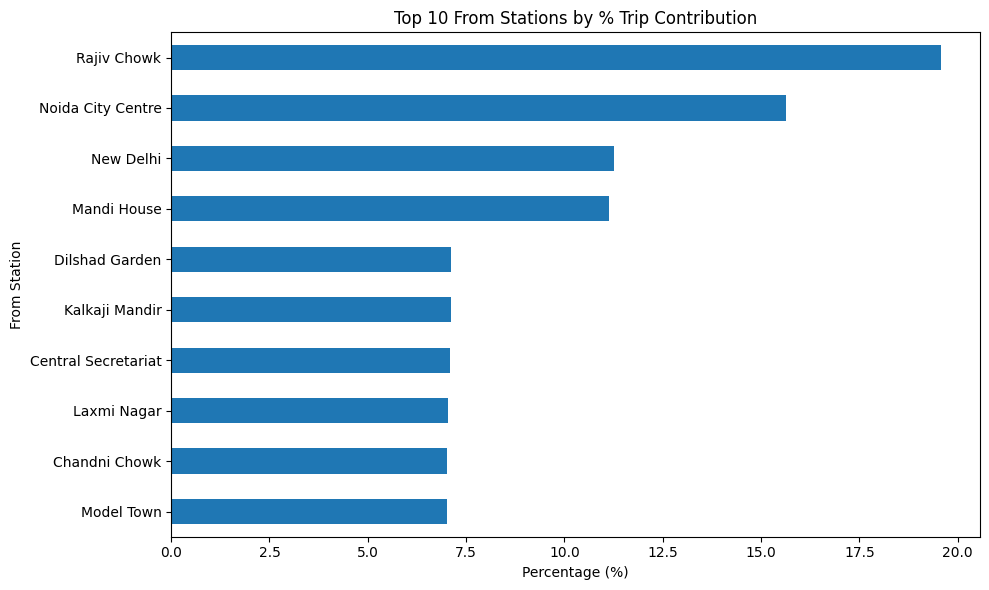

In [57]:
plt.figure(figsize=(10,6))
station_counts = df['From_Station'].value_counts().nlargest(10)
station_pct = (station_counts / station_counts.sum()) * 100

station_pct.plot(kind='barh')
plt.title('Top 10 From Stations by % Trip Contribution')
plt.xlabel('Percentage (%)')
plt.ylabel('From Station')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

/tmp/ipython-input-3409609318.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=from_counts.values, y=from_counts.index, palette='viridis')


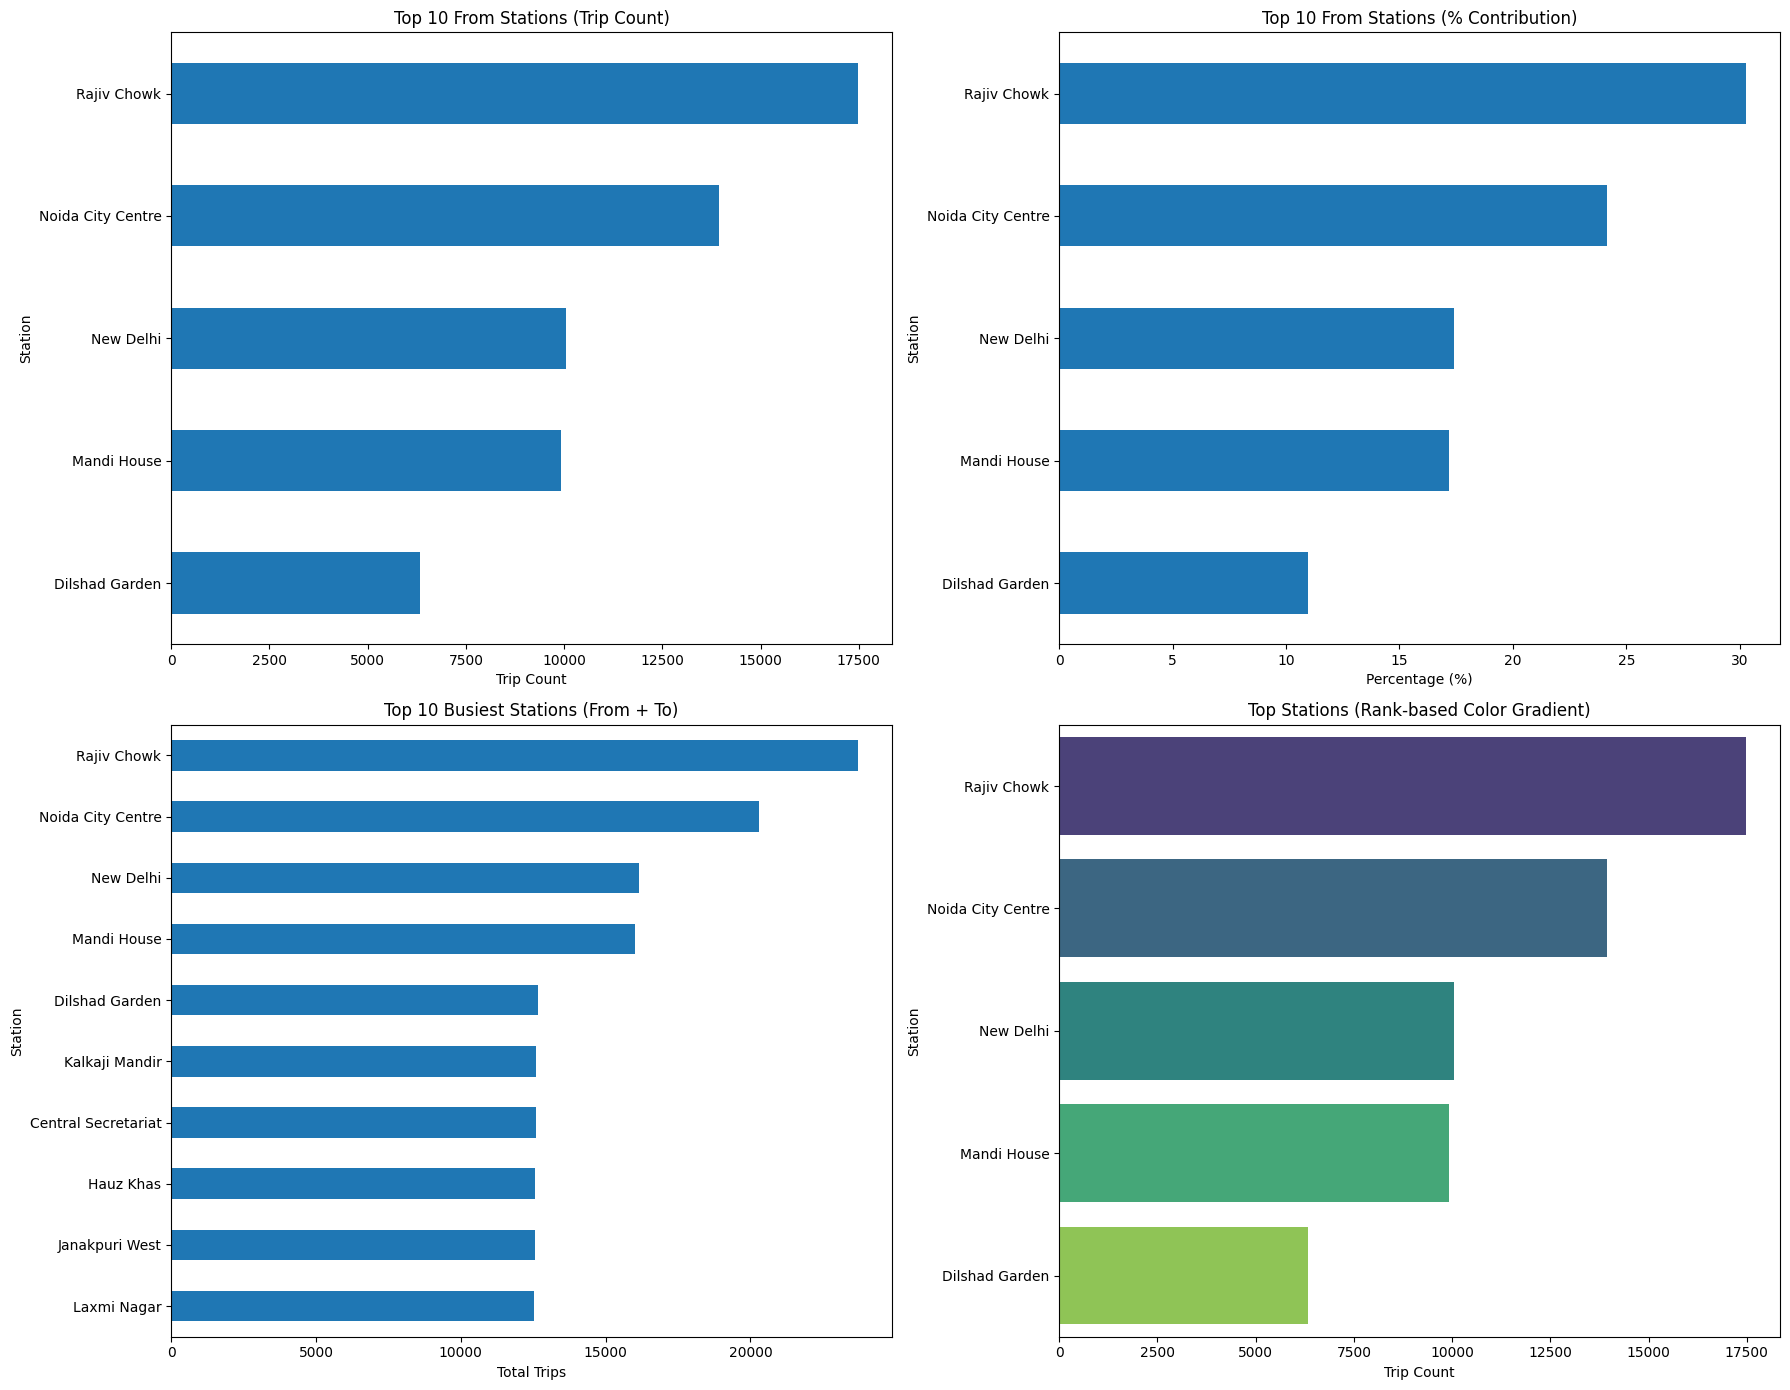

In [58]:
# Prepare data
from_counts = df['From_Station'].value_counts().nlargest(5)
from_pct = (from_counts / from_counts.sum()) * 100
total_counts = (df['From_Station'].value_counts() + df['To_Station'].value_counts()).nlargest(10)

plt.figure(figsize=(18, 14))

# Chart 1: Top 10 From Stations (Count)
plt.subplot(2, 2, 1)
from_counts.plot(kind='barh')
plt.title('Top 10 From Stations (Trip Count)')
plt.xlabel('Trip Count')
plt.ylabel('Station')
plt.gca().invert_yaxis()

# Chart 2: Percentage Contribution
plt.subplot(2, 2, 2)
from_pct.plot(kind='barh')
plt.title('Top 10 From Stations (% Contribution)')
plt.xlabel('Percentage (%)')
plt.ylabel('Station')
plt.gca().invert_yaxis()

# Chart 3: Total Station Usage (From + To)
plt.subplot(2, 2, 3)
total_counts.plot(kind='barh')
plt.title('Top 10 Busiest Stations (From + To)')
plt.xlabel('Total Trips')
plt.ylabel('Station')
plt.gca().invert_yaxis()

# Chart 4: Color Gradient Bar Chart for Ranking
plt.subplot(2, 2, 4)
sns.barplot(x=from_counts.values, y=from_counts.index, palette='viridis')
plt.title('Top Stations (Rank-based Color Gradient)')
plt.xlabel('Trip Count')
plt.ylabel('Station')

plt.tight_layout()
plt.show()


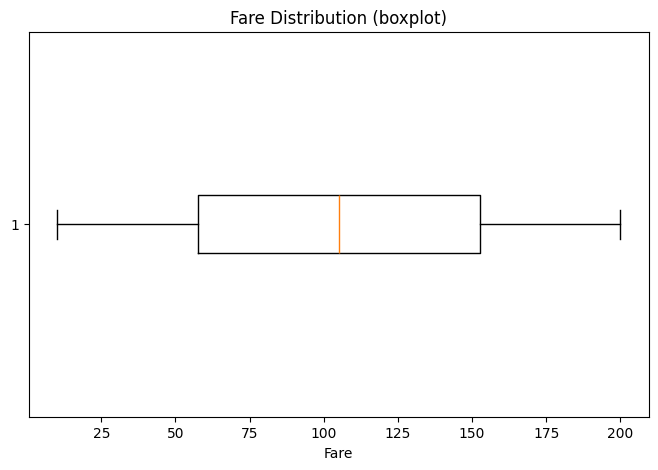

In [59]:
plt.figure(figsize=(8,5))
plt.boxplot(df['Fare'].dropna(), vert=False)
plt.title('Fare Distribution (boxplot)')
plt.xlabel('Fare')
plt.show()

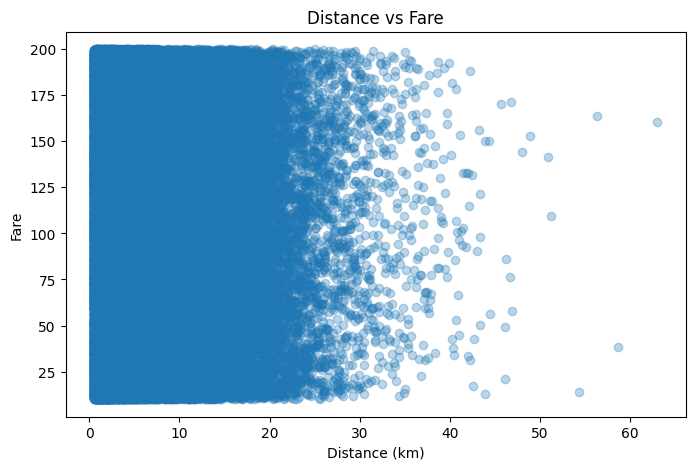

In [60]:
plt.figure(figsize=(8,5))
plt.scatter(df['Distance_km'], df['Fare'], alpha=0.3)
plt.title('Distance vs Fare')
plt.xlabel('Distance (km)')
plt.ylabel('Fare')
plt.show()

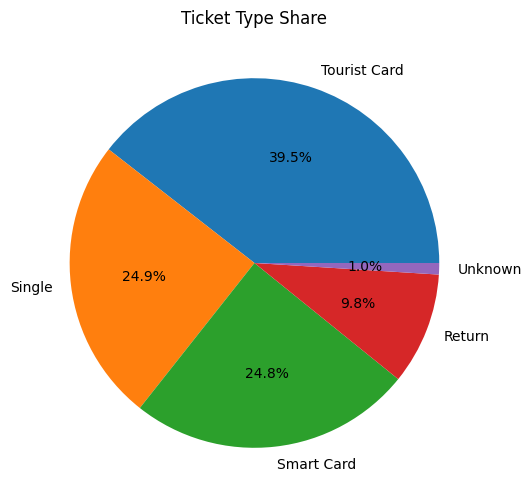

In [61]:
plt.figure(figsize=(6,6))
tt = df['Ticket_Type'].fillna('Unknown').value_counts()
plt.pie(tt, labels=tt.index, autopct='%1.1f%%')
plt.title('Ticket Type Share')
plt.show()

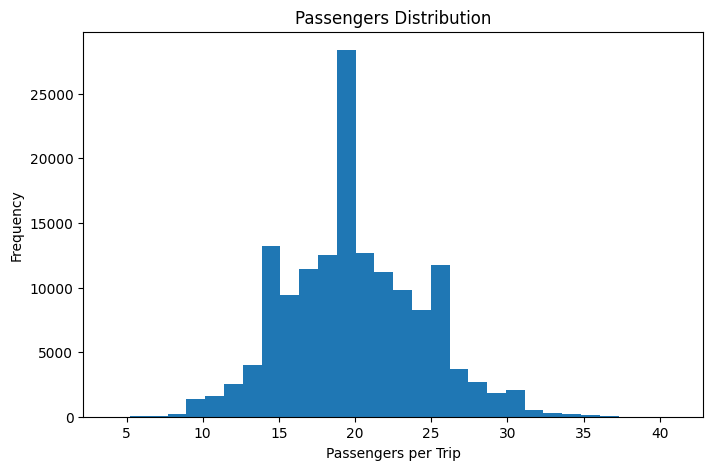

In [62]:
plt.figure(figsize=(8,5))
plt.hist(df['Passengers'], bins=30)
plt.title('Passengers Distribution')
plt.xlabel('Passengers per Trip')
plt.ylabel('Frequency')
plt.show()

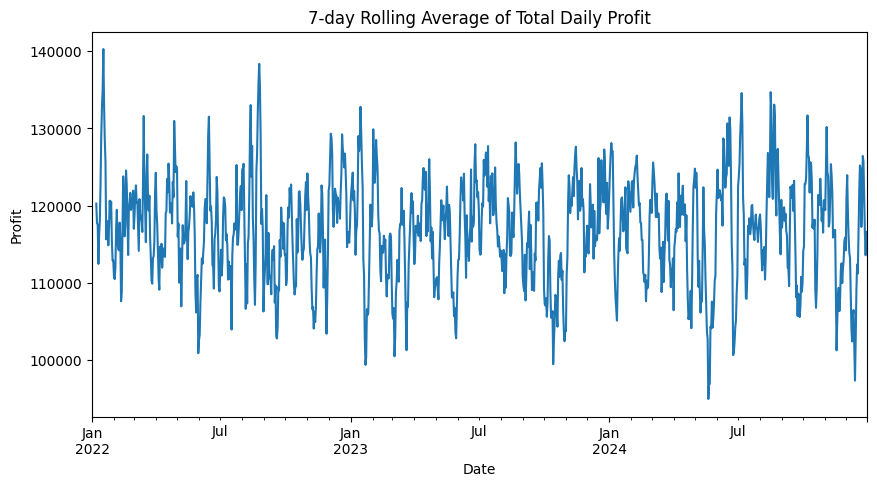

In [63]:
plt.figure(figsize=(10,5))
df['Date'] = pd.to_datetime(df['Date'])
daily = df.groupby('Date')['Profit'].sum().sort_index()
daily.rolling(window=7).mean().plot()
plt.title('7-day Rolling Average of Total Daily Profit')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()